In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

import xgboost
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn import set_config



df =pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [5]:
df.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [6]:
VehicleDataDesc=[]

for i in df.columns:
    VehicleDataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=VehicleDataDesc,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[75177, 170679]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[32, 47]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[11.0, 9.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[58395.0, 43176.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[81.0, 118.0]"


In [7]:
pd.crosstab(index=df['Response'],columns='count',normalize=True)*100

# 1 : Customer is interested

# 0 : Customer is not interested

col_0,count
Response,
0,87.743664
1,12.256336


In [8]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [9]:
#DROP Unessecary columns

df.drop(columns=['id','Region_Code'],inplace=True)

# Do Features affect response of vehicle's insurance?

In [10]:
df.corr()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,0.014969,-0.011906,0.043731,-0.000848,0.010155
Previously_Insured,-0.254682,0.014969,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,-0.341170,0.022575,-0.139042,-0.001050,1.000000


## Label Encoding 

### Gender

In [11]:
df['Gender_encode']=df['Gender'].map({'Male':0,"Female":1})

In [12]:
df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encode
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1,0
1,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1,0
3,Male,21,1,1,< 1 Year,No,28619.0,152.0,203,0,0
4,Female,29,1,1,< 1 Year,No,27496.0,152.0,39,0,1


In [13]:
df.drop(columns=['Gender'],inplace=True)

In [14]:
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encode
0,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1,0
1,76,1,0,1-2 Year,No,33536.0,26.0,183,0,0
2,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1,0
3,21,1,1,< 1 Year,No,28619.0,152.0,203,0,0
4,29,1,1,< 1 Year,No,27496.0,152.0,39,0,1


### Vehicle Age

In [15]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [16]:
df['Vehicle_age_encode']=df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [17]:
df.drop(columns=['Vehicle_Age'],inplace=True)

In [18]:
df.head()

,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encode,Vehicle_age_encode
0,44,1,0,Yes,40454.0,26.0,217,1,0,2
1,76,1,0,No,33536.0,26.0,183,0,0,1
2,47,1,0,Yes,38294.0,26.0,27,1,0,2
3,21,1,1,No,28619.0,152.0,203,0,0,0
4,29,1,1,No,27496.0,152.0,39,0,1,0


### Vehicle Damage

In [19]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Damge_encode']=df['Vehicle_Damage'].map({'Yes':1,"No":0})

In [21]:
df.drop(columns=['Vehicle_Damage'],inplace=True)
df.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_encode,Vehicle_age_encode,Damge_encode
0,44,1,0,40454.0,26.0,217,1,0,2,1
1,76,1,0,33536.0,26.0,183,0,0,1,0
2,47,1,0,38294.0,26.0,27,1,0,2,1
3,21,1,1,28619.0,152.0,203,0,0,0,0
4,29,1,1,27496.0,152.0,39,0,1,0,0


## SPLITING DATA

In [22]:
from sklearn.model_selection import train_test_split

X= df.drop(columns='Response')
y=df['Response']

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size= 0.8,stratify=y,random_state=42)

# Machine Learning - Base Model

## Logistic Regression Model

In [23]:
modelLogreg= LogisticRegression()

modelLogreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
Logreg_pred=modelLogreg.predict(X_test)
Logreg_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## K Nearest Neighbors

In [25]:
model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
KNN_pred=model_KNN.predict(X_test)
KNN_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## XG Boost

In [27]:
model_XGB = XGBClassifier()

model_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
XGB_pred=model_XGB.predict(X_test)
XGB_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluation Matrix - Base Model

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score

## Logistic Regression 

In [30]:
acc_LogReg=accuracy_score(y_test,Logreg_pred)
prec_LogReg=precision_score(y_test,Logreg_pred)
recal_LogReg=recall_score(y_test,Logreg_pred)
f1_LogReg=f1_score(y_test,Logreg_pred)

In [31]:
print(classification_report(y_test,Logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     66880
           1       0.39      0.06      0.10      9342

    accuracy                           0.87     76222
   macro avg       0.64      0.52      0.51     76222
weighted avg       0.82      0.87      0.83     76222



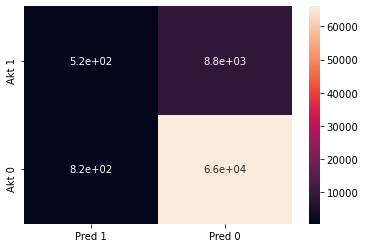

In [32]:
cm=confusion_matrix(y_test,Logreg_pred,labels=[1,0])

df_cm=pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm,annot=True)
plt.show()

## K Nearest Neighbors

In [33]:
acc_KNN=accuracy_score(y_test,KNN_pred)
prec_KNN=precision_score(y_test,KNN_pred)
recal_KNN=recall_score(y_test,KNN_pred)
f1_KNN=f1_score(y_test,KNN_pred)

In [34]:
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     66880
           1       0.22      0.06      0.09      9342

    accuracy                           0.86     76222
   macro avg       0.55      0.51      0.51     76222
weighted avg       0.80      0.86      0.82     76222



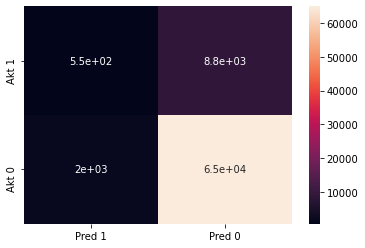

In [35]:
cm_KNN=confusion_matrix(y_test,KNN_pred,labels=[1,0])

df_cm_KNN=pd.DataFrame(data=cm_KNN,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_KNN,annot=True)
plt.show()

## XG Boost

In [36]:
acc_XGB=accuracy_score(y_test,XGB_pred)
prec_XGB=precision_score(y_test,XGB_pred)
recal_XGB=recall_score(y_test,XGB_pred)
f1_XGB=f1_score(y_test,XGB_pred)

print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.43      0.02      0.04      9342

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.49     76222
weighted avg       0.82      0.88      0.82     76222



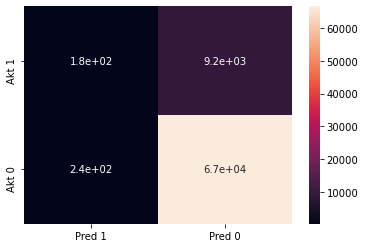

In [37]:
cm_XGB=confusion_matrix(y_test,XGB_pred,labels=[1,0])

df_cm_XGB=pd.DataFrame(data=cm_XGB,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])

sns.heatmap(df_cm_XGB,annot=True)
plt.show()

In [38]:
data = {
    "K Nearest Neighbors" : [acc_KNN, prec_KNN, recal_KNN, f1_KNN],
    "Logistic Regression" : [acc_LogReg, prec_LogReg, recal_LogReg, f1_LogReg],
    "XG Boost" : [acc_XGB, prec_XGB, recal_XGB, f1_XGB]
}

pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])

,K Nearest Neighbors,Logistic Regression,XG Boost
Accuracy,0.858742,0.873554,0.876689
Precission,0.216925,0.389387,0.431325
Recall,0.058446,0.055770,0.019161
F1 Score,0.092082,0.097566,0.036692


## Hyper Parameter Tuning

### Minimizing False Negative => Recall Targeted

In [39]:
tuning_1=SVC(max_iter=300)

In [40]:
param_svm={
    'C':[1, 0.001, 0.01, 0.1, 10, 100, 1000],
    'kernel': ['rbf','linear'],
    'gamma':[1, 0.001, 0.01, 0.1, 10, 100, 1000]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model_tuning_1 = GridSearchCV(estimator=tuning_1, 
                              param_grid=param_svm, 
                              cv=3,
                             n_jobs=-1,
                             verbose=1,
                             scoring='recall')

In [43]:
model_tuning_1.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 25.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=300,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [44]:
model_tuning_1.best_score_

1.0

In [45]:
model_tuned_1=model_tuning_1.best_estimator_

In [46]:
y_tuned_1=model_tuned_1.predict(X_test)
y_tuned_1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
cm_model_tuned_1=confusion_matrix(y_test,y_tuned_1,labels=[1,0])

df_model_tuned_1=pd.DataFrame(data=cm_model_tuned_1,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])
df_model_tuned_1

,Pred 1,Pred 0
Akt 1,9342,0
Akt 0,66877,3


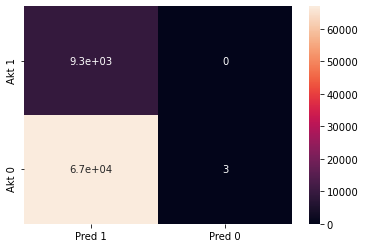

In [90]:
sns.heatmap(df_model_tuned_1,annot=True)
plt.show()

In [94]:
acc_ytuned1=accuracy_score(y_test,y_tuned_1)
prec_ytuned1=precision_score(y_test,y_tuned_1)
recal_ytuned1=recall_score(y_test,y_tuned_1)
f1_ytuned1=f1_score(y_test,y_tuned_1)

print(classification_report(y_test,y_tuned_1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     66880
           1       0.12      1.00      0.22      9342

    accuracy                           0.12     76222
   macro avg       0.56      0.50      0.11     76222
weighted avg       0.89      0.12      0.03     76222



In [96]:
data = {
    "Hyper parameter tuning 1 (Recall)" : [acc_ytuned1, prec_ytuned1, recal_ytuned1, f1_ytuned1],
    "Hyper parameter tuning 2 (Precision)"  : [acc_ytuned2, prec_ytuned2, recal_ytuned2, f1_ytuned2]
}

pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])

,Hyper parameter tuning 1 (Recall),Hyper parameter tuning 2 (Precision)
Accuracy,0.122602,0.877358
Precission,0.122568,0.363636
Recall,1.000000,0.000856
F1 Score,0.218371,0.001709


### Minimizing false positive - Precission targeted

In [49]:
tuning_2=SVC(max_iter=300)

In [50]:
param_svm={
    'C':[1, 0.001, 0.01, 0.1, 10, 100, 1000],
    'kernel': ['rbf','linear'],
    'gamma':[1, 0.001, 0.01, 0.1, 10, 100, 1000]
}

In [51]:
model_tuning_2 = GridSearchCV(estimator=tuning_1, 
                              param_grid=param_svm, 
                              cv=3,
                             n_jobs=-1,
                             verbose=1,
                             scoring='precision')

In [52]:
model_tuning_2.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed: 26.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=300,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=1)

In [53]:
model_tuning_2.best_score_

0.37051282051282053

In [54]:
model_tuned_2=model_tuning_2.best_estimator_
y_tuned_2=model_tuned_2.predict(X_test)
y_tuned_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
cm_model_tuned_2=confusion_matrix(y_test,y_tuned_2,labels=[1,0])

df_model_tuned_2=pd.DataFrame(data=cm_model_tuned_2,columns=['Pred 1','Pred 0'],index=['Akt 1', 'Akt 0'])
df_model_tuned_2

,Pred 1,Pred 0
Akt 1,8,9334
Akt 0,14,66866


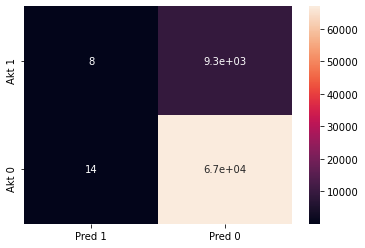

In [92]:
sns.heatmap(df_model_tuned_2,annot=True)
plt.show()

In [93]:
acc_ytuned2=accuracy_score(y_test,y_tuned_2)
prec_ytuned2=precision_score(y_test,y_tuned_2)
recal_ytuned2=recall_score(y_test,y_tuned_2)
f1_ytuned2=f1_score(y_test,y_tuned_2)

print(classification_report(y_test,y_tuned_2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.36      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.62      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



# Handling Imbalanced data



In [57]:
df_train = pd.concat([X_train, y_train], axis=1)

In [58]:
df_train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_encode,Vehicle_age_encode,Damge_encode,Response
274710,22,1,0,25455.0,152.0,203,0,0,1,0
216539,26,1,1,38393.0,26.0,45,1,0,0,0
78983,32,1,0,32118.0,122.0,35,1,0,1,1
218368,32,1,0,37711.0,152.0,215,0,0,1,0
307215,24,1,0,48706.0,156.0,222,1,0,1,0


In [59]:
df_train['Response'].value_counts()

0    267519
1     37368
Name: Response, dtype: int64

In [60]:
not_interested = df_train[df_train['Response'] == 0] ##  Majority
interested = df_train[df_train['Response'] == 1] ##  Minority

# 0 : Customer is not interested
# 1 : Customer is interested

## Random Sampling

In [61]:
from sklearn.utils import resample

In [62]:
interest_oversample = resample(interested, ## Kelas Minority
                           replace=True,
                           n_samples = len(not_interested), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [63]:
df_OverSampled = pd.concat([not_interested, interest_oversample])

In [64]:
df_OverSampled['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [65]:
X_train_OverSample = df_OverSampled.drop(columns='Response')
y_train_OverSample = df_OverSampled['Response']

## Logistic Regression - Oversampled

In [66]:
modelOS = LogisticRegression()

In [67]:
modelOS.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_predOS = modelOS.predict(X_test)

In [69]:
print(classification_report(y_test, y_predOS))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75     66880
           1       0.25      0.95      0.40      9342

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



## Confusion Matrix - Log Reg oversampled

In [70]:
cm_OS = confusion_matrix(y_test, y_predOS, labels=[1 , 0])

In [71]:
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,8918,424
Akt 0,26119,40761


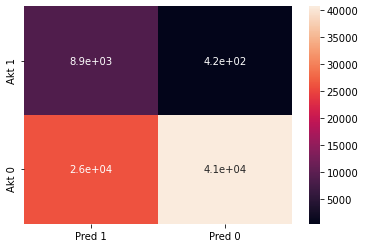

In [86]:
sns.heatmap(df_OS, annot=True)
plt.show()

In [87]:
acc_LogRegOversampled=accuracy_score(y_test,y_predOS)
prec_LogRegOversampled=precision_score(y_test,y_predOS)
recal_LogRegOversampled=recall_score(y_test,y_predOS)
f1_LogRegOversampled=f1_score(y_test,y_predOS)

print(classification_report(y_test,y_predOS))

              precision    recall  f1-score   support

           0       0.99      0.61      0.75     66880
           1       0.25      0.95      0.40      9342

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



## Logistic Regression - SMOTE

In [79]:
modelSMOTE = LogisticRegression()

In [80]:
modelSMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred_sm = modelSMOTE.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     66880
           1       0.28      0.83      0.41      9342

    accuracy                           0.71     76222
   macro avg       0.62      0.76      0.61     76222
weighted avg       0.88      0.71      0.76     76222



## Confusion Matrix - Log Reg SMOTE

In [83]:
cm_sm = confusion_matrix(y_test, y_pred_sm, labels=[1 , 0])

In [84]:
df_sm = pd.DataFrame(data=cm_sm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

pd.DataFrame(data=cm_sm, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])

,Pred 1,Pred 0
Akt 1,7788,1554
Akt 0,20451,46429


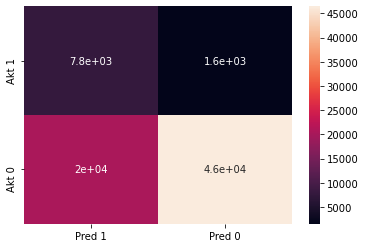

In [88]:
sns.heatmap(df_sm, annot=True)
plt.show()

In [89]:
acc_LogRegSmote=accuracy_score(y_test,y_pred_sm)
prec_LogRegSmote=precision_score(y_test,y_pred_sm)
recal_LogRegSmote=recall_score(y_test,y_pred_sm)
f1_LogRegSmote=f1_score(y_test,y_pred_sm)

print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     66880
           1       0.28      0.83      0.41      9342

    accuracy                           0.71     76222
   macro avg       0.62      0.76      0.61     76222
weighted avg       0.88      0.71      0.76     76222



In [98]:
data = {
    "Logistic Regression Oversampled" : [acc_LogRegOversampled, prec_LogRegOversampled, recal_LogRegOversampled, f1_LogRegOversampled],
    "Logistic Regression SMOTE"  : [acc_LogRegSmote, prec_LogRegSmote, recal_LogRegSmote, f1_LogRegSmote]
}

pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])

,Logistic Regression Oversampled,Logistic Regression SMOTE
Accuracy,0.651767,0.711304
Precission,0.254531,0.275789
Recall,0.954614,0.833654
F1 Score,0.401902,0.414465


# SUMMARY

In [102]:
data = {
    "K Nearest Neighbors" : [acc_KNN, prec_KNN, recal_KNN, f1_KNN],
    "Logistic Regression" : [acc_LogReg, prec_LogReg, recal_LogReg, f1_LogReg],
    "XG Boost" : [acc_XGB, prec_XGB, recal_XGB, f1_XGB],
    "Hyper parameter tuning 1 (Recall)" : [acc_ytuned1, prec_ytuned1, recal_ytuned1, f1_ytuned1],
    "Hyper parameter tuning 2 (Precision)"  : [acc_ytuned2, prec_ytuned2, recal_ytuned2, f1_ytuned2],
    "Logistic Regression Oversampled" : [acc_LogRegOversampled, prec_LogRegOversampled, recal_LogRegOversampled, f1_LogRegOversampled],
    "Logistic Regression SMOTE"  : [acc_LogRegSmote, prec_LogRegSmote, recal_LogRegSmote, f1_LogRegSmote]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precission', 'Recall', 'F1 Score'])


,K Nearest Neighbors,Logistic Regression,XG Boost,Hyper parameter tuning 1 (Recall),Hyper parameter tuning 2 (Precision),Logistic Regression Oversampled,Logistic Regression SMOTE
Accuracy,0.858742,0.873554,0.876689,0.122602,0.877358,0.651767,0.711304
Precission,0.216925,0.389387,0.431325,0.122568,0.363636,0.254531,0.275789
Recall,0.058446,0.055770,0.019161,1.000000,0.000856,0.954614,0.833654
F1 Score,0.092082,0.097566,0.036692,0.218371,0.001709,0.401902,0.414465


In [ ]:
According these applied models, we consider using Logistic Regression with SMOTE feature Engineering 